## Housing Assingment- Jeevak Ghosh

The solution is divided into the following sections:

###### Data understanding and exploration
##### Data cleaning
##### Data preparation
##### Model building and evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import os
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
house = pd.read_csv("train.csv")

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
Row1=len(house)
print(Row1)
house.describe()

1460


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### To check for Null values

In [6]:
round(100*(house.isnull().sum()/len(house.index)),2).sort_values(ascending=False).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Utilities        0.00
dtype: float64

### The data dictionary gives us the information that the null values of Pool, Alley, Fireplace & Fence here is high as NA here does not stand for null. It just means the amenities are not present in the house, hence instead of dropping them retaining them might be beneficial here. 

In [7]:
print(100*house['PoolQC'].value_counts(normalize = True))
house.PoolQC= house.PoolQC.replace(np.nan, 'NoPool')
house.PoolQC.value_counts(normalize=True)
100*house['PoolQC'].value_counts(normalize = True)

Gd    42.857143
Ex    28.571429
Fa    28.571429
Name: PoolQC, dtype: float64


NoPool    99.520548
Gd         0.205479
Ex         0.136986
Fa         0.136986
Name: PoolQC, dtype: float64

In [8]:
print(100*house['MiscFeature'].value_counts(normalize = True))
house.MiscFeature= house.MiscFeature.replace(np.nan, 'NoMiscFeature')
house.MiscFeature.value_counts(normalize=True)
100*house['MiscFeature'].value_counts(normalize = True)

Shed    90.740741
Gar2     3.703704
Othr     3.703704
TenC     1.851852
Name: MiscFeature, dtype: float64


NoMiscFeature    96.301370
Shed              3.356164
Gar2              0.136986
Othr              0.136986
TenC              0.068493
Name: MiscFeature, dtype: float64

In [9]:
print(100*house['Fence'].value_counts(normalize = True))
house.Fence= house.Fence.replace(np.nan, 'NoFence')
house.Fence.value_counts(normalize=True)
100*house['Fence'].value_counts(normalize = True)

MnPrv    55.871886
GdPrv    20.996441
GdWo     19.217082
MnWw      3.914591
Name: Fence, dtype: float64


NoFence    80.753425
MnPrv      10.753425
GdPrv       4.041096
GdWo        3.698630
MnWw        0.753425
Name: Fence, dtype: float64

In [10]:
print(100*house['FireplaceQu'].value_counts(normalize = True))
house.FireplaceQu= house.FireplaceQu.replace(np.nan, 'NoFireplace')
house.FireplaceQu.value_counts(normalize=True)
100*house['FireplaceQu'].value_counts(normalize = True)

Gd    49.350649
TA    40.649351
Fa     4.285714
Ex     3.116883
Po     2.597403
Name: FireplaceQu, dtype: float64


NoFireplace    47.260274
Gd             26.027397
TA             21.438356
Fa              2.260274
Ex              1.643836
Po              1.369863
Name: FireplaceQu, dtype: float64

In [11]:
print(100*house['Alley'].value_counts(normalize = True))
house.Alley= house.Alley.replace(np.nan, 'NoAlley')
house.Alley.value_counts(normalize=True)
100*house['Alley'].value_counts(normalize = True)

Grvl    54.945055
Pave    45.054945
Name: Alley, dtype: float64


NoAlley    93.767123
Grvl        3.424658
Pave        2.808219
Name: Alley, dtype: float64

In [12]:
round(100*(house.isnull().sum()/len(house.index)),2).sort_values(ascending=False).head(20)

LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
LotShape         0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
Foundation       0.00
ExterQual        0.00
dtype: float64

### We can see that there are certain features which have high null values. We need to analyse them furthermore to determine what needs to be done next.

In [13]:
#to check for the variable if they are continuous or categorical before imputing them
house['LotFrontage'].astype('category').value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
138.0      1
106.0      1
46.0       1
137.0      1
182.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [14]:
#to create a new dataset with numerical variables
newdemo=house[['LotFrontage','GarageYrBlt','MasVnrArea']]
newdemo.head()

,LotFrontage,GarageYrBlt,MasVnrArea
0,65.0,2003.0,196.0
1,80.0,1976.0,0.0
2,68.0,2001.0,162.0
3,60.0,1998.0,0.0
4,84.0,2000.0,350.0


In [15]:
#to impute the data more accurately for the continuous variables with Random Forest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
it = IterativeImputer(estimator = RandomForestRegressor())
newdemo2 = pd.DataFrame(it.fit_transform(newdemo))
newdemo2.columns = newdemo.columns
newdemo2.head()

,LotFrontage,GarageYrBlt,MasVnrArea
0,65.0,2003.0,196.0
1,80.0,1976.0,0.0
2,68.0,2001.0,162.0
3,60.0,1998.0,0.0
4,84.0,2000.0,350.0


In [16]:
house = house.merge(newdemo2)

In [17]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,NoMiscFeature,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,NoMiscFeature,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,NoMiscFeature,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,NoMiscFeature,0,2,2006,WD,Abnorml,140000
4,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,NoMiscFeature,0,2,2006,WD,Abnorml,140000


In [18]:
round(100*(house.isnull().sum()/len(house.index)),2).sort_values(ascending=False).head(20)

BsmtFinType2    3.65
BsmtExposure    3.65
BsmtQual        3.59
BsmtFinType1    3.59
BsmtCond        3.59
Electrical      0.30
ExterQual       0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
MasVnrType      0.00
MasVnrArea      0.00
SalePrice       0.00
ExterCond       0.00
Foundation      0.00
YearRemodAdd    0.00
BsmtFinSF1      0.00
BsmtFinSF2      0.00
BsmtUnfSF       0.00
RoofStyle       0.00
dtype: float64

### As we can see there are certain categorical values that still have some null values, so it would be better to check the variables and imbalance before imputing them. 

In [19]:
100*house['BsmtFinType2'].value_counts(normalize = True)

Unf    88.275434
Rec     3.784119
BLQ     2.977667
LwQ     2.915633
GLQ     1.178660
ALQ     0.868486
Name: BsmtFinType2, dtype: float64

In [20]:
#Instead of imputing them with any other value, we can club the values as missing here.
house.BsmtFinType2= house.BsmtFinType2.replace(np.nan, 'NoBasement')
house.BsmtFinType2.value_counts(normalize=True)
100*house['BsmtFinType2'].value_counts(normalize = True)

Unf           85.056784
Rec            3.646145
NoBasement     3.646145
BLQ            2.869097
LwQ            2.809325
GLQ            1.135684
ALQ            0.836820
Name: BsmtFinType2, dtype: float64

In [21]:
100*house['BsmtExposure'].value_counts(normalize = True)

No    70.781638
Av    14.143921
Mn     8.498759
Gd     6.575682
Name: BsmtExposure, dtype: float64

In [22]:
house.BsmtExposure= house.BsmtExposure.replace(np.nan, 'NoBasement')
house.BsmtExposure.value_counts(normalize=True)
100*house['BsmtExposure'].value_counts(normalize = True)

No            68.200837
Av            13.628213
Mn             8.188882
Gd             6.335923
NoBasement     3.646145
Name: BsmtExposure, dtype: float64

In [23]:
100*house['BsmtFinType1'].value_counts(normalize = True)

Unf    34.345939
GLQ    25.294482
ALQ    14.507130
Rec    10.291383
BLQ     9.733416
LwQ     5.827650
Name: BsmtFinType1, dtype: float64

In [24]:
house.BsmtFinType1= house.BsmtFinType1.replace(np.nan, 'NoBasement')
house.BsmtFinType1.value_counts(normalize=True)
100*house['BsmtFinType1'].value_counts(normalize = True)

Unf           33.114166
GLQ           24.387328
ALQ           13.986850
Rec            9.922295
BLQ            9.384340
LwQ            5.618649
NoBasement     3.586372
Name: BsmtFinType1, dtype: float64

In [25]:
100*house['BsmtCond'].value_counts(normalize = True)

TA    90.328580
Fa     4.649721
Gd     4.587725
Po     0.433974
Name: BsmtCond, dtype: float64

In [26]:
house.BsmtCond= house.BsmtCond.replace(np.nan, 'NoBasement')
house.BsmtCond.value_counts(normalize=True)
100*house['BsmtCond'].value_counts(normalize = True)

TA            87.089062
Fa             4.482965
Gd             4.423192
NoBasement     3.586372
Po             0.418410
Name: BsmtCond, dtype: float64

In [27]:
print(100*house['BsmtQual'].value_counts(normalize = True))
house.BsmtQual= house.BsmtCond.replace(np.nan, 'NoBasement')
house.BsmtQual.value_counts(normalize=True)
100*house['BsmtQual'].value_counts(normalize = True)

TA    48.419095
Gd    38.995660
Ex     7.439554
Fa     5.145691
Name: BsmtQual, dtype: float64


TA            87.089062
Fa             4.482965
Gd             4.423192
NoBasement     3.586372
Po             0.418410
Name: BsmtQual, dtype: float64

In [28]:
print(100*house['Electrical'].value_counts(normalize = True))
house.Electrical= house.Electrical.replace(np.nan, 'NoBasement')
house.Electrical.value_counts(normalize=True)
100*house['Electrical'].value_counts(normalize = True)

SBrkr    88.129496
FuseA     8.752998
FuseF     2.577938
Mix       0.419664
FuseP     0.119904
Name: Electrical, dtype: float64


SBrkr         87.866109
FuseA          8.726838
FuseF          2.570233
Mix            0.418410
NoBasement     0.298864
FuseP          0.119546
Name: Electrical, dtype: float64

### Since the variables BsmtFinType2, BsmtCond, Electrical and BsmtQual have highly imabalanced data we can delete them.

In [29]:
house.drop(columns = ['BsmtFinType2', 'BsmtCond','Electrical', 'BsmtQual'], inplace = True)

In [30]:
print("Before:",house.shape)
house=house.dropna(axis = 0, how ='any')
print("After:",house.shape)

Before: (1673, 77)
After: (1673, 77)


In [31]:
#to drop the ID column
house.drop(columns = ['Id'], inplace = True)

In [32]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1673 entries, 0 to 1672
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1673 non-null   int64  
 1   MSZoning       1673 non-null   object 
 2   LotFrontage    1673 non-null   float64
 3   LotArea        1673 non-null   int64  
 4   Street         1673 non-null   object 
 5   Alley          1673 non-null   object 
 6   LotShape       1673 non-null   object 
 7   LandContour    1673 non-null   object 
 8   Utilities      1673 non-null   object 
 9   LotConfig      1673 non-null   object 
 10  LandSlope      1673 non-null   object 
 11  Neighborhood   1673 non-null   object 
 12  Condition1     1673 non-null   object 
 13  Condition2     1673 non-null   object 
 14  BldgType       1673 non-null   object 
 15  HouseStyle     1673 non-null   object 
 16  OverallQual    1673 non-null   int64  
 17  OverallCond    1673 non-null   int64  
 18  YearBuil

In [33]:
Row2=len(house)
print(Row2)

1673


In [34]:
print(Row1/Row2)

0.8726838015540944


### We can see that there are no null values and we have retained 87% of the values. So we can move ahead with the data preparaton next.

In [35]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,0,NoPool,NoFence,NoMiscFeature,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,...,0,NoPool,NoFence,NoMiscFeature,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,...,0,NoPool,NoFence,NoMiscFeature,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,...,0,NoPool,NoFence,NoMiscFeature,0,2,2006,WD,Abnorml,140000
4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,...,0,NoPool,NoFence,NoMiscFeature,0,2,2006,WD,Abnorml,140000


In [36]:
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000


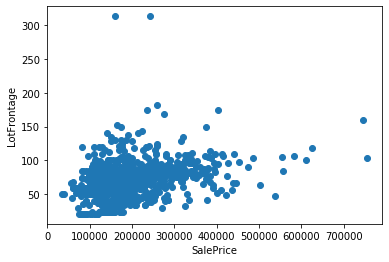

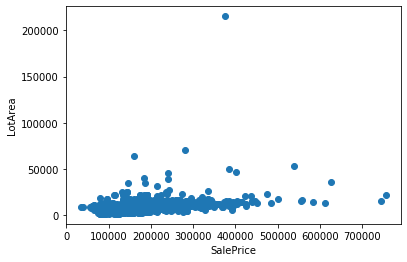

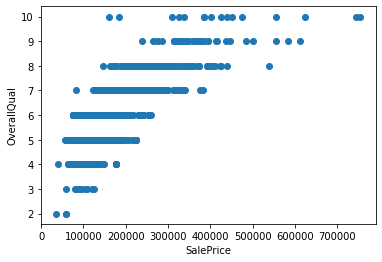

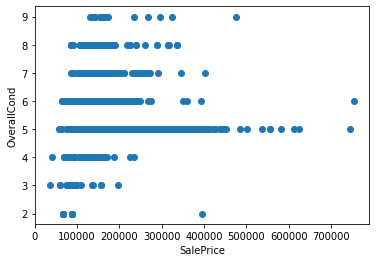

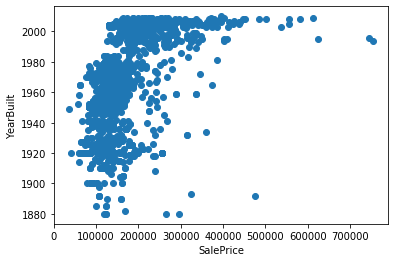

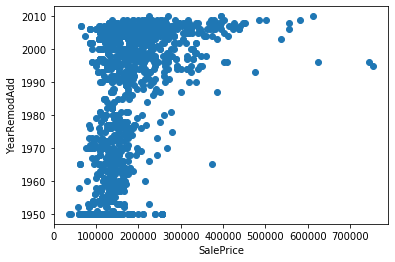

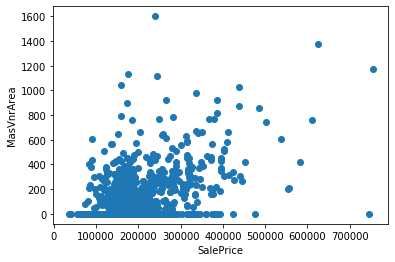

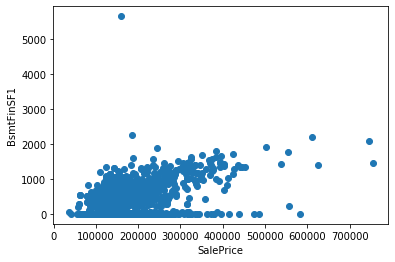

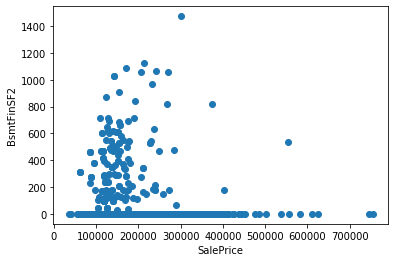

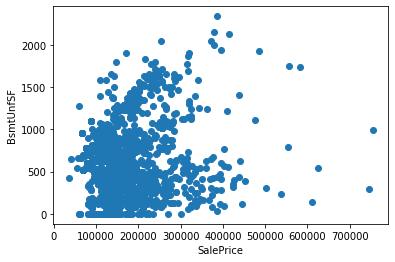

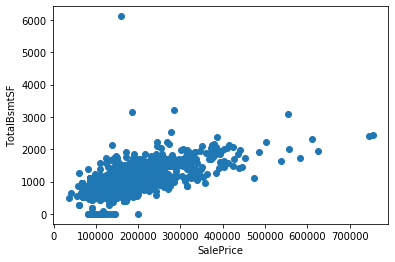

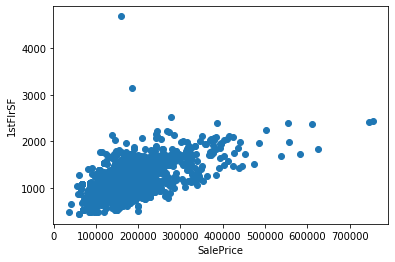

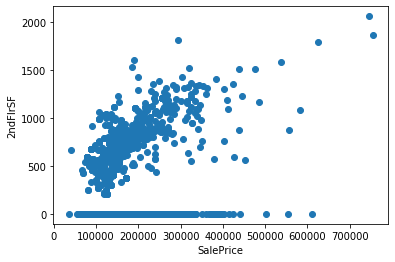

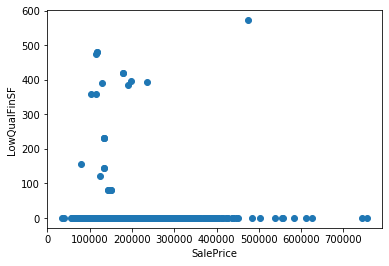

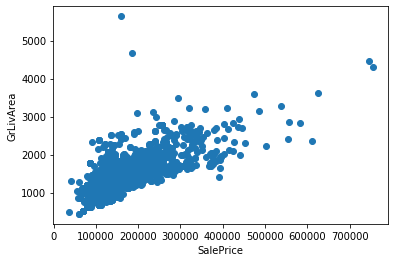

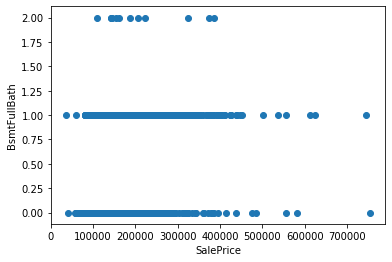

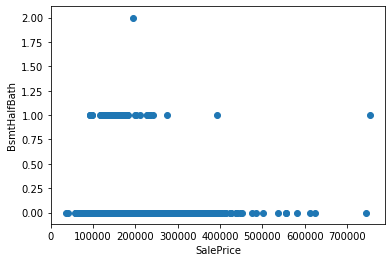

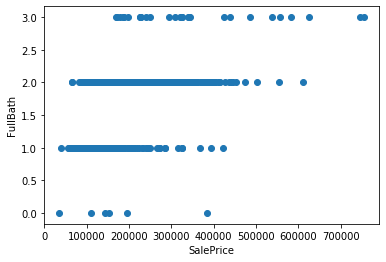

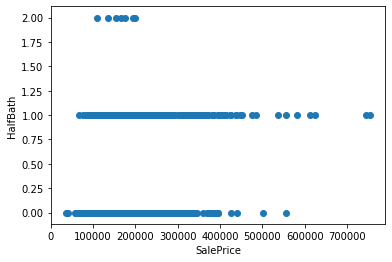

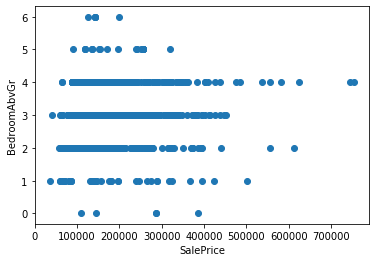

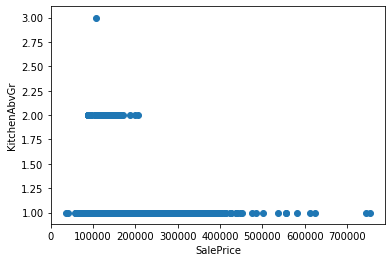

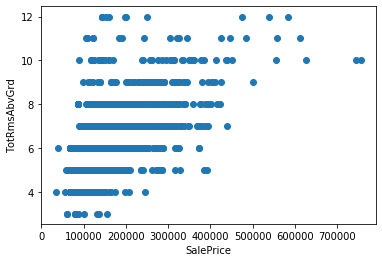

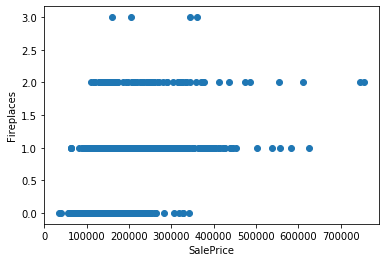

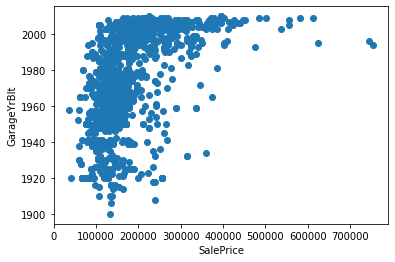

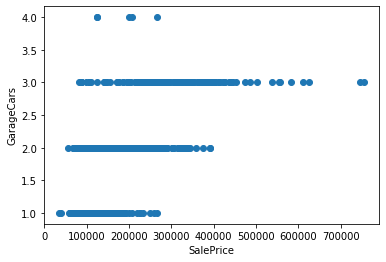

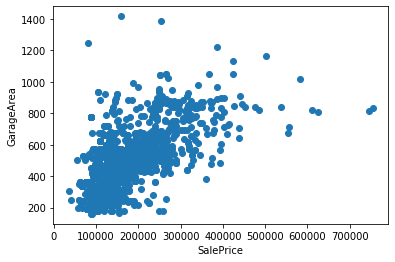

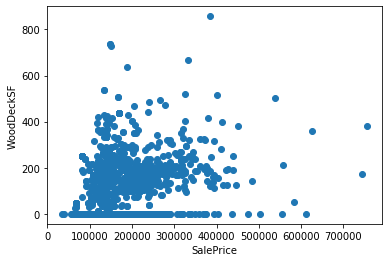

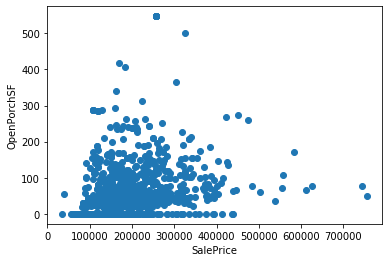

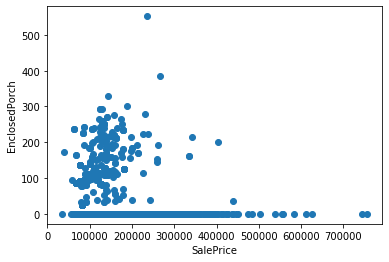

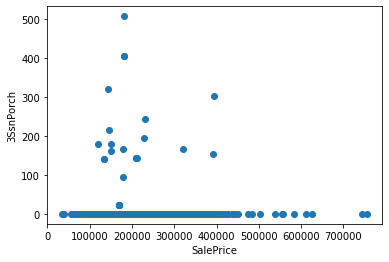

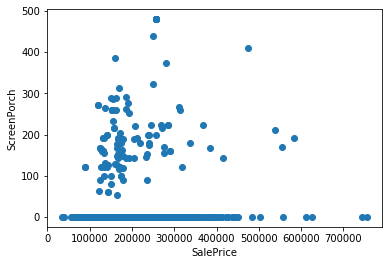

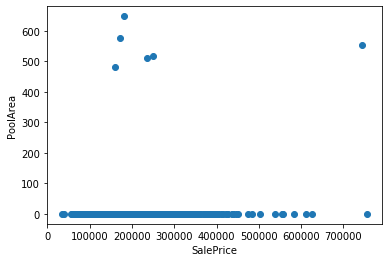

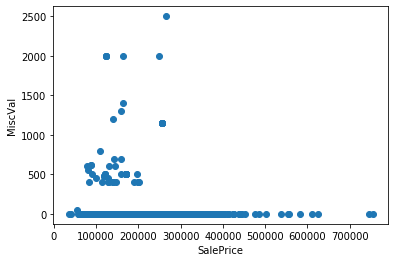

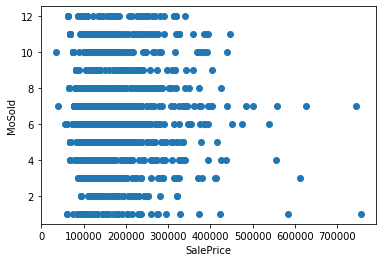

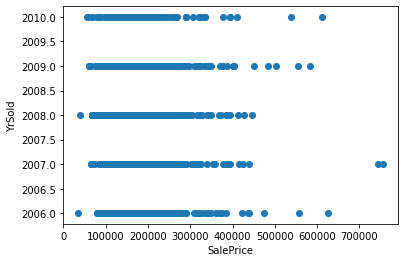

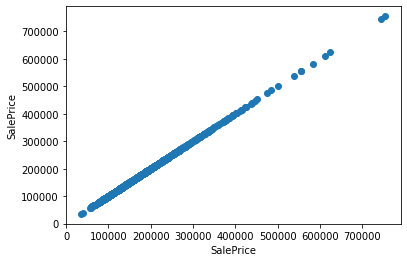

In [37]:
plt.figure()
for col in range(1, house_numeric.shape[1]):
    plt.scatter(house_numeric["SalePrice"], house_numeric.iloc[:, col])
    plt.ylabel(house_numeric.columns[col])
    plt.xlabel("SalePrice")
    plt.show()


##### From the above it can be seen that there is positive corelation between price and a lot of other numerical variables like LotArea, Yearbuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF,GrLivArea,GarageYrBuilt,GarageArea,WoodDeckSF, and OpenPorchSF. 
#### We can see certain features may have outliers like LotArea, LotFrontage, MasVnrArea, BsmtFinSF1, Total BsmntSF, KitchenAbvGr.

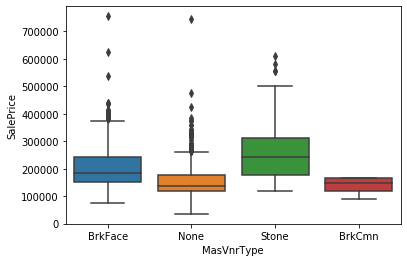

In [38]:
sns.boxplot(house.MasVnrType,house.SalePrice)
plt.show()

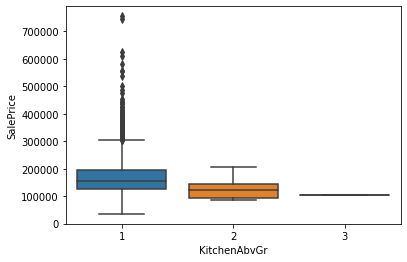

In [39]:
sns.boxplot(house.KitchenAbvGr,house.SalePrice)
plt.show()

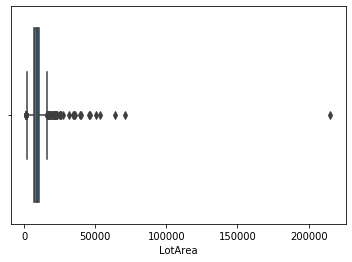

In [40]:
sns.boxplot(house.LotArea)

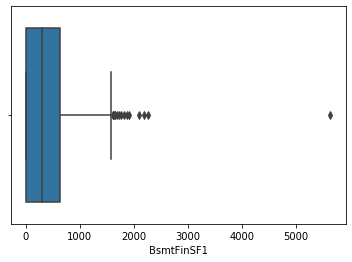

In [41]:
sns.boxplot(house.BsmtFinSF1)

#### We can see that most variables do seem to have outliers here but since these are about basement, masonry and other aspects of the house which can be exceptions so retaining them would be the best case scenario here. 

### Data Preparation

In [42]:
house.SalePrice.describe()

count      1673.000000
mean     170350.959354
std       75445.650265
min       35311.000000
25%      124500.000000
50%      151000.000000
75%      193500.000000
max      755000.000000
Name: SalePrice, dtype: float64

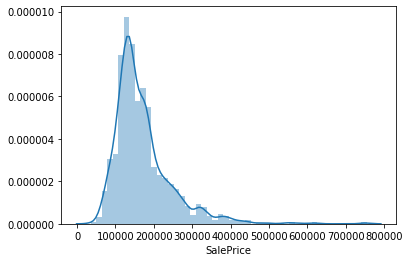

In [43]:
sns.distplot(house['SalePrice'])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E6C677108>]],
      dtype=object)

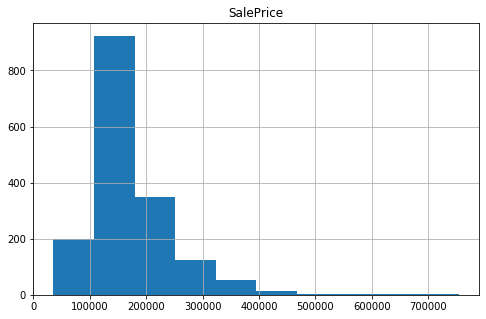

In [44]:
house.hist('SalePrice',figsize=(8,5))

### We can see that the target variable "SalePrice" seems to be heavily skewed to the right here. In this case we need to do a transformation to balance the skewness. We can do log transformation in this case. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E6C40DE08>]],
      dtype=object)

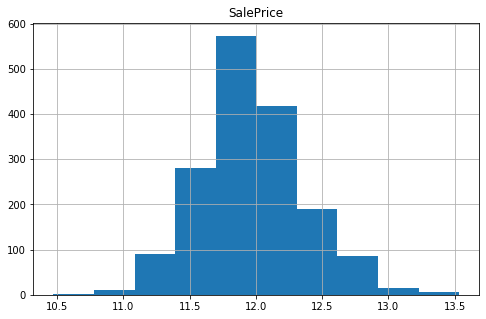

In [45]:
house['SalePrice'] = np.log(house['SalePrice'])
house.hist('SalePrice',figsize=(8,5))

In [46]:
house.SalePrice.describe()

count    1673.000000
mean       11.966730
std         0.386248
min        10.471950
25%        11.732061
50%        11.925035
75%        12.173033
max        13.534473
Name: SalePrice, dtype: float64

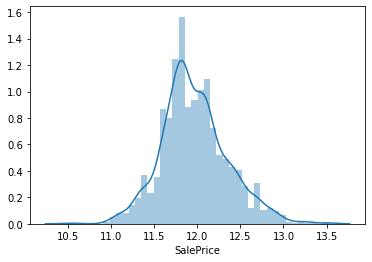

In [47]:
sns.distplot(house['SalePrice'])
plt.show()

In [48]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1673 entries, 0 to 1672
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1673 non-null   int64  
 1   MSZoning       1673 non-null   object 
 2   LotFrontage    1673 non-null   float64
 3   LotArea        1673 non-null   int64  
 4   Street         1673 non-null   object 
 5   Alley          1673 non-null   object 
 6   LotShape       1673 non-null   object 
 7   LandContour    1673 non-null   object 
 8   Utilities      1673 non-null   object 
 9   LotConfig      1673 non-null   object 
 10  LandSlope      1673 non-null   object 
 11  Neighborhood   1673 non-null   object 
 12  Condition1     1673 non-null   object 
 13  Condition2     1673 non-null   object 
 14  BldgType       1673 non-null   object 
 15  HouseStyle     1673 non-null   object 
 16  OverallQual    1673 non-null   int64  
 17  OverallCond    1673 non-null   int64  
 18  YearBuil

In [49]:
print(100*house['YearRemodAdd'].value_counts(normalize = True))

1950    19.784818
2006     7.471608
2007     5.857741
2005     5.857741
2004     4.243873
          ...    
2010     0.298864
1984     0.239091
1951     0.239091
1986     0.179319
1983     0.119546
Name: YearRemodAdd, Length: 61, dtype: float64


In [50]:
print(100*house['YearBuilt'].value_counts(normalize = True))

2005    6.694561
1950    5.080693
2006    4.781829
2004    3.765690
1920    3.646145
          ...   
1893    0.059773
1985    0.059773
1942    0.059773
1882    0.059773
2010    0.059773
Name: YearBuilt, Length: 109, dtype: float64


In [51]:
print(100*house['GarageYrBlt'].value_counts(normalize = True))

2005.0    7.232516
1950.0    6.634788
2006.0    3.945009
2007.0    3.885236
2003.0    3.825463
            ...   
1927.0    0.059773
1908.0    0.059773
1906.0    0.059773
1900.0    0.059773
1942.0    0.059773
Name: GarageYrBlt, Length: 97, dtype: float64


In [52]:
print(100*house['YrSold'].value_counts(normalize = True))

2009    24.805738
2006    22.594142
2007    21.876868
2008    20.681411
2010    10.041841
Name: YrSold, dtype: float64


### We need to convert all the year columns to age for better prediction. 

In [53]:
import datetime
now = datetime.datetime.now()
current_year = now.year
print(current_year)

2020


In [54]:
#to change the GarageYrBlt variable
house.GarageYrBlt = current_year - house.GarageYrBlt
print(house.GarageYrBlt)

0       17.0
1       44.0
2       19.0
3       22.0
4       22.0
        ... 
1668    25.0
1669    12.0
1670    21.0
1671    42.0
1672    79.0
Name: GarageYrBlt, Length: 1673, dtype: float64


In [55]:
#to change the YearRemodAdd variable
house.YearRemodAdd = current_year - house.YearRemodAdd
print(house.YearRemodAdd)

0       17
1       44
2       18
3       50
4       50
        ..
1668    24
1669    11
1670    20
1671    32
1672    14
Name: YearRemodAdd, Length: 1673, dtype: int64


In [56]:
#to change the YearBuilt variable
house.YearBuilt = current_year - house.YearBuilt
print(house.YearBuilt)

0        17
1        44
2        19
3       105
4       105
       ... 
1668     25
1669     12
1670     21
1671     42
1672     79
Name: YearBuilt, Length: 1673, dtype: int64


In [57]:
#to change the YrSold variable
house.YrSold = current_year - house.YrSold
print(house.YrSold)

0       12
1       13
2       12
3       14
4       14
        ..
1668    13
1669    11
1670    13
1671    10
1672    10
Name: YrSold, Length: 1673, dtype: int64


#### There are certain categorical variables that can be label encoded to reduce the frequency of the dummy variables.

In [58]:
#to map the categorical variable 'ExterQual'
print(100*house['ExterQual'].value_counts(normalize = True))
var=['ExterQual']
def binary_map(x):
    return x.map({'Po': 0, 'Fa': 1, 'TA':2, 'Gd':3, 'Ex':4})

# Applying the function to the housing list
house[var] = house[var].apply(binary_map)
100*house['ExterQual'].value_counts(normalize = True)

TA    65.630604
Gd    30.603706
Ex     2.749552
Fa     1.016139
Name: ExterQual, dtype: float64


2    65.630604
3    30.603706
4     2.749552
1     1.016139
Name: ExterQual, dtype: float64

In [59]:
#to map the categorical variable 'ExterCond'
print(100*house['ExterCond'].value_counts(normalize = True))
var=['ExterCond']
def binary_map(x):
    return x.map({'Po': 0, 'Fa': 1, 'TA':2, 'Gd':3, 'Ex':4})

# Applying the function to the housing list
house[var] = house[var].apply(binary_map)
100*house['ExterCond'].value_counts(normalize = True)

TA    88.284519
Gd     9.384340
Fa     2.151823
Ex     0.179319
Name: ExterCond, dtype: float64


2    88.284519
3     9.384340
1     2.151823
4     0.179319
Name: ExterCond, dtype: float64

In [60]:
#to map the categorical variable 'BsmtExposure'
print(100*house['BsmtExposure'].value_counts(normalize = True))
var=['BsmtExposure']
def binary_map(x):
    return x.map({'NoBasement': 0, 'No': 1, 'Mn':2, 'Av':3, 'Gd':4})

# Applying the function to the housing list
house[var] = house[var].apply(binary_map)
100*house['BsmtExposure'].value_counts(normalize = True)

No            68.200837
Av            13.628213
Mn             8.188882
Gd             6.335923
NoBasement     3.646145
Name: BsmtExposure, dtype: float64


1    68.200837
3    13.628213
2     8.188882
4     6.335923
0     3.646145
Name: BsmtExposure, dtype: float64

In [61]:
#to map the categorical variable 'HeatingQC'
print(100*house['HeatingQC'].value_counts(normalize = True))
var=['HeatingQC']
def binary_map(x):
    return x.map({'Po': 0, 'Fa': 1, 'TA':2, 'Gd':3, 'Ex':4})

# Applying the function to the housing list
house[var] = house[var].apply(binary_map)
100*house['HeatingQC'].value_counts(normalize = True)

Ex    49.731022
TA    28.870293
Gd    17.095039
Fa     4.184100
Po     0.119546
Name: HeatingQC, dtype: float64


4    49.731022
2    28.870293
3    17.095039
1     4.184100
0     0.119546
Name: HeatingQC, dtype: float64

In [62]:
#to map the categorical variable 'CentralAir'
print(100*house['CentralAir'].value_counts(normalize = True))
var=['CentralAir']
def binary_map(x):
    return x.map({'N': 0, 'Y': 1})

# Applying the function to the housing list
house[var] = house[var].apply(binary_map)
100*house['CentralAir'].value_counts(normalize = True)

Y    91.930663
N     8.069337
Name: CentralAir, dtype: float64


1    91.930663
0     8.069337
Name: CentralAir, dtype: float64

In [63]:
#to map the categorical variable 'KitchenQual'
print(100*house['KitchenQual'].value_counts(normalize = True))
var=['KitchenQual']
def binary_map(x):
    return x.map({'Po': 0, 'Fa': 1, 'TA':2, 'Gd':3, 'Ex':4})

# Applying the function to the housing list
house[var] = house[var].apply(binary_map)
100*house['KitchenQual'].value_counts(normalize = True)

TA    54.154214
Gd    37.298267
Ex     6.276151
Fa     2.271369
Name: KitchenQual, dtype: float64


2    54.154214
3    37.298267
4     6.276151
1     2.271369
Name: KitchenQual, dtype: float64

In [64]:
#to map the categorical variable 'FireplaceQu'
print(100*house['FireplaceQu'].value_counts(normalize = True))
var=['FireplaceQu']
def binary_map(x):
    return x.map({'NoFireplace': 0, 'Po': 1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

# Applying the function to the housing list
house[var] = house[var].apply(binary_map)
100*house['FireplaceQu'].value_counts(normalize = True)

NoFireplace    53.257621
Gd             26.300060
TA             16.317992
Fa              1.733413
Ex              1.255230
Po              1.135684
Name: FireplaceQu, dtype: float64


0    53.257621
4    26.300060
3    16.317992
2     1.733413
5     1.255230
1     1.135684
Name: FireplaceQu, dtype: float64

In [65]:
#to map the categorical variable 'GarageQual'
print(100*house['GarageQual'].value_counts(normalize = True))
var=['GarageQual']
def binary_map(x):
    return x.map({'NoGarage': 0, 'Po': 1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

# Applying the function to the housing list
house[var] = house[var].apply(binary_map)
100*house['GarageQual'].value_counts(normalize = True)

TA    91.392708
Fa     6.933652
Gd     0.956366
Po     0.537956
Ex     0.179319
Name: GarageQual, dtype: float64


3    91.392708
2     6.933652
4     0.956366
1     0.537956
5     0.179319
Name: GarageQual, dtype: float64

In [66]:
#to map the categorical variable 'GarageCond'
print(100*house['GarageCond'].value_counts(normalize = True))
var=['GarageCond']
def binary_map(x):
    return x.map({'NoGarage': 0, 'Po': 1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

# Applying the function to the housing list
house[var] = house[var].apply(binary_map)
100*house['GarageCond'].value_counts(normalize = True)

TA    93.664077
Fa     4.722056
Po     1.135684
Gd     0.358637
Ex     0.119546
Name: GarageCond, dtype: float64


3    93.664077
2     4.722056
1     1.135684
4     0.358637
5     0.119546
Name: GarageCond, dtype: float64

In [67]:
#to map the categorical variable 'PoolQC'
print(100*house['PoolQC'].value_counts(normalize = True))
var=['PoolQC']
def binary_map(x):
    return x.map({'NoPool': 0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

# Applying the function to the housing list
house[var] = house[var].apply(binary_map)
100*house['PoolQC'].value_counts(normalize = True)

NoPool    99.641363
Ex         0.119546
Fa         0.119546
Gd         0.119546
Name: PoolQC, dtype: float64


0    99.641363
4     0.119546
3     0.119546
1     0.119546
Name: PoolQC, dtype: float64

In [68]:
var=['PavedDrive']
def binary_map(x):
    return x.map({'N': 'Dirt', 'P':'PartialPave', 'Y':'Paved'})

# Applying the function to the housing list
house[var] = house[var].apply(binary_map)
100*house['PavedDrive'].value_counts(normalize = True)

Paved          89.539749
Dirt            7.292289
PartialPave     3.167962
Name: PavedDrive, dtype: float64

In [69]:
print(100*house['Alley'].value_counts(normalize = True))
var=['Alley']
def binary_map(x):
    return x.map({'NoAlley': 'NoAL', 'Grvl':'GravelAL', 'Pave':'PaveAL'})

# Applying the function to the housing list
house[var] = house[var].apply(binary_map)
100*house['Alley'].value_counts(normalize = True)

NoAlley    90.914525
Grvl        5.379558
Pave        3.705918
Name: Alley, dtype: float64


NoAL        90.914525
GravelAL     5.379558
PaveAL       3.705918
Name: Alley, dtype: float64

In [70]:
print(100*house['Street'].value_counts(normalize = True))
var=['Street']
def binary_map(x):
    return x.map({'Grvl':0, 'Pave':1})

# Applying the function to the housing list
house[var] = house[var].apply(binary_map)
100*house['Street'].value_counts(normalize = True)

Pave    99.760909
Grvl     0.239091
Name: Street, dtype: float64


1    99.760909
0     0.239091
Name: Street, dtype: float64

### Creating Dummy Variables

In [71]:
house.nunique().sort_values(ascending=True).head(50)

Utilities         1
Street            2
CentralAir        2
PavedDrive        3
Alley             3
GarageFinish      3
BsmtHalfBath      3
LandSlope         3
KitchenAbvGr      3
HalfBath          3
BsmtFullBath      3
ExterQual         4
MasVnrType        4
PoolQC            4
MiscFeature       4
GarageCars        4
ExterCond         4
Fireplaces        4
FullBath          4
LandContour       4
LotShape          4
KitchenQual       4
GarageQual        5
GarageCond        5
MSZoning          5
HeatingQC         5
BsmtExposure      5
YrSold            5
LotConfig         5
RoofStyle         5
Fence             5
BldgType          5
Heating           5
SaleCondition     6
GarageType        6
FireplaceQu       6
Functional        6
Foundation        6
Condition2        6
RoofMatl          7
BedroomAbvGr      7
BsmtFinType1      7
PoolArea          7
OverallCond       8
HouseStyle        8
OverallQual       9
Condition1        9
SaleType          9
TotRmsAbvGrd     10
MoSold           12


In [72]:
#to list the categorical variables with less than 30 unique values
categorical_col = np.array(house.columns.where(house.nunique()<30).dropna())
categorical_col

array(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'], dtype=object)

In [73]:
#Lot of variables seem to be imbalanced here hence we need to delete them before creating dummy variables
house.drop(columns = ['GarageQual','GarageCond','3SsnPorch', 'PoolArea','PoolQC','MiscVal','MiscFeature','PavedDrive','Functional','SaleType','CentralAir','ExterCond','GarageQual','GarageCond','Alley','Street','LandContour','Utilities','LandSlope','Condition2','RoofMatl','Heating','BsmtHalfBath','KitchenAbvGr'], inplace = True)

In [74]:
100*house['Exterior1st'].value_counts(normalize = True)

VinylSd    35.564854
MetalSd    17.692767
Wd Sdng    16.975493
HdBoard    11.057980
Plywood     5.080693
BrkFace     4.722056
CemntBd     3.347280
AsbShng     2.032277
WdShing     1.733413
Stucco      1.434549
BrkComm     0.179319
CBlock      0.059773
Stone       0.059773
ImStucc     0.059773
Name: Exterior1st, dtype: float64

In [75]:
# to dummify the variable
dummy_SaleCondition = pd.get_dummies(house['SaleCondition'], drop_first = False)
dummy_GarageFinish= dummy_SaleCondition.drop(columns = ['AdjLand'])
house = pd.concat([house,dummy_SaleCondition], axis =1)
house.drop(columns = ['SaleCondition'], inplace = True)

In [76]:
# to dummify the variable
dummy_GarageFinish = pd.get_dummies(house['GarageFinish'], drop_first = False)
dummy_GarageFinish= dummy_GarageFinish.drop(columns = ['Fin'])
house = pd.concat([house,dummy_GarageFinish], axis =1)
house.drop(columns = ['GarageFinish'], inplace = True)

In [77]:
# to dummify the variable
dummy_Fence = pd.get_dummies(house['Fence'], drop_first = False)
dummy_Fence= dummy_Fence.drop(columns = ['MnWw'])
house = pd.concat([house,dummy_Fence], axis =1)
house.drop(columns = ['Fence'], inplace = True)

In [78]:
# to dummify the variable
dummy_GarageType = pd.get_dummies(house['GarageType'], drop_first = False)
dummy_GarageType= dummy_GarageType.drop(columns = ['2Types'])
house = pd.concat([house,dummy_GarageType], axis =1)
house.drop(columns = ['GarageType'], inplace = True)

In [79]:
# to dummify the variable
dummy_BsmtFinType1 = pd.get_dummies(house['BsmtFinType1'], drop_first = False)
dummy_BsmtFinType1= dummy_BsmtFinType1.drop(columns = ['Unf'])
house = pd.concat([house,dummy_BsmtFinType1], axis =1)
house.drop(columns = ['BsmtFinType1'], inplace = True)

In [80]:
#to dummify multiple variables
house= pd.get_dummies(house, columns=['MasVnrType'], drop_first=True)
house= pd.get_dummies(house, columns=['Exterior2nd'], drop_first=True)
house= pd.get_dummies(house, columns=['Foundation'], drop_first=True)

In [81]:
# to dummify the variable
dummy_Exterior1st = pd.get_dummies(house['Exterior1st'],drop_first = True)
house = pd.concat([house,dummy_Exterior1st], axis =1)
house.drop(columns = ['Exterior1st'], inplace = True)

In [82]:
# to dummify the variable
dummy_RoofStyle = pd.get_dummies(house['RoofStyle'], drop_first = False)
dummy_RoofStyle= dummy_RoofStyle.drop(columns = ['Mansard'])
house = pd.concat([house,dummy_RoofStyle], axis =1)
house.drop(columns = ['RoofStyle'], inplace = True)

In [83]:
# to dummify the variable
dummy_HouseStyle = pd.get_dummies(house['HouseStyle'], drop_first = False)
dummy_HouseStyle= dummy_HouseStyle.drop(columns = ['2.5Fin'])
house = pd.concat([house,dummy_HouseStyle], axis =1)
house.drop(columns = ['HouseStyle'], inplace = True)

In [84]:
# to dummify the variable
dummy_BldgType = pd.get_dummies(house['BldgType'], drop_first = False)
dummy_BldgType = dummy_BldgType.drop(columns = ['2fmCon'])
house = pd.concat([house,dummy_BldgType], axis =1)
house.drop(columns = ['BldgType'], inplace = True)

In [85]:
# to dummify the variable
dummy_LotShape = pd.get_dummies(house['LotShape'], drop_first = False)
dummy_LotShape = dummy_LotShape.drop(columns = ['IR3'])
house = pd.concat([house,dummy_LotShape], axis =1)
house.drop(columns = ['LotShape'], inplace = True)

In [86]:
#to dummify the variable
dummy_LotConfig = pd.get_dummies(house['LotConfig'], drop_first = False)
dummy_LotConfig = dummy_LotConfig.drop(columns = ['FR3'])
house = pd.concat([house,dummy_LotConfig], axis =1)
house.drop(columns = ['LotConfig'], inplace = True)


In [87]:
#to dummify the variable
dummy_Neighborhood = pd.get_dummies(house['Neighborhood'], drop_first = False)
dummy_Neighborhood = dummy_Neighborhood.drop(columns = ['Blueste'])
house = pd.concat([house,dummy_Neighborhood], axis =1)
house.drop(columns = ['Neighborhood'], inplace = True)

In [88]:
#to dummify the variable
dummy_MSZoning = pd.get_dummies(house['MSZoning'], drop_first = False)
dummy_MSZoning = dummy_MSZoning.drop(columns = ['C (all)'])
house = pd.concat([house,dummy_MSZoning], axis =1)
house.drop(columns = ['MSZoning'], inplace = True)

In [89]:
#to dummify the variable
dummy_Condition1 = pd.get_dummies(house['Condition1'], drop_first = False)
dummy_Condition1 = dummy_Condition1.drop(columns = ['RRNe'])
house = pd.concat([house,dummy_Condition1], axis =1)
house.drop(columns = ['Condition1'], inplace = True)

In [90]:
#to check if all variables have single instances
house.columns.value_counts().head(50)

RL                     1
RRAn                   1
BrkComm                1
Exterior2nd_Stucco     1
GarageCars             1
1.5Unf                 1
SFoyer                 1
GdWo                   1
SWISU                  1
Exterior2nd_Stone      1
BsmtExposure           1
KitchenQual            1
BrkFace                1
Reg                    1
CemntBd                1
Timber                 1
2ndFlrSF               1
2.5Unf                 1
NPkVill                1
RRAe                   1
Attchd                 1
Normal                 1
SLvl                   1
Exterior2nd_Wd Shng    1
ImStucc                1
Gable                  1
MoSold                 1
MetalSd                1
Foundation_Stone       1
Mitchel                1
PosA                   1
OldTown                1
Foundation_Wood        1
MasVnrType_BrkFace     1
MasVnrArea             1
Flat                   1
PosN                   1
Partial                1
Exterior2nd_CmentBd    1
EnclosedPorch          1


In [91]:
house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtExposure,...,RL,RM,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn
0,60,65.0,8450,7,5,17,17,196.0,3,1,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,44,44,0.0,2,4,...,1,0,0,1,0,0,0,0,0,0
2,60,68.0,11250,7,5,19,18,162.0,3,2,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,105,50,0.0,2,1,...,1,0,0,0,1,0,0,0,0,0
4,70,60.0,9550,7,5,105,50,0.0,2,1,...,1,0,0,0,1,0,0,0,0,0


### Building the model


##### Test-Train split

In [92]:
# Putting feature variable to X and scaling
from sklearn.preprocessing import scale
X = house
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtExposure,...,RL,RM,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn
0,0.102152,-0.107208,-0.158479,0.779785,-0.503679,-1.117773,-0.900296,0.740785,1.179126,-0.514390,...,0.57528,-0.472179,-0.208969,-0.227024,0.404254,-0.05475,-0.084997,-0.088495,-0.160471,-0.077545
1,-0.854601,0.588162,0.007979,0.020867,2.099788,-0.272439,0.302593,-0.456125,-0.637336,2.522929,...,0.57528,-0.472179,-0.208969,4.404820,-2.473691,-0.05475,-0.084997,-0.088495,-0.160471,-0.077545
2,0.102152,0.031866,0.246810,0.779785,-0.503679,-1.055156,-0.855744,0.533158,1.179126,0.498050,...,0.57528,-0.472179,-0.208969,-0.227024,0.404254,-0.05475,-0.084997,-0.088495,-0.160471,-0.077545
3,0.341340,-0.338998,0.000741,0.779785,-0.503679,1.637388,0.569901,-0.456125,-0.637336,-0.514390,...,0.57528,-0.472179,-0.208969,-0.227024,0.404254,-0.05475,-0.084997,-0.088495,-0.160471,-0.077545
4,0.341340,-0.338998,0.000741,0.779785,-0.503679,1.637388,0.569901,-0.456125,-0.637336,-0.514390,...,0.57528,-0.472179,-0.208969,-0.227024,0.404254,-0.05475,-0.084997,-0.088495,-0.160471,-0.077545


In [93]:
# Putting response variable to y
y = house.pop('SalePrice')
X = house

In [94]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtExposure,...,RL,RM,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn
0,60,65.0,8450,7,5,17,17,196.0,3,1,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,44,44,0.0,2,4,...,1,0,0,1,0,0,0,0,0,0
2,60,68.0,11250,7,5,19,18,162.0,3,2,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,105,50,0.0,2,1,...,1,0,0,0,1,0,0,0,0,0
4,70,60.0,9550,7,5,105,50,0.0,2,1,...,1,0,0,0,1,0,0,0,0,0


In [95]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    11.849398
Name: SalePrice, dtype: float64

In [96]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [97]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 25)
rfe = rfe.fit(X_train, y_train)

In [98]:
#to identify the ranking of the variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 103),
 ('LotFrontage', False, 115),
 ('LotArea', False, 125),
 ('OverallQual', True, 1),
 ('OverallCond', False, 64),
 ('YearBuilt', False, 105),
 ('YearRemodAdd', False, 109),
 ('MasVnrArea', False, 123),
 ('ExterQual', False, 101),
 ('BsmtExposure', False, 82),
 ('BsmtFinSF1', False, 127),
 ('BsmtFinSF2', False, 124),
 ('BsmtUnfSF', False, 126),
 ('TotalBsmtSF', False, 122),
 ('HeatingQC', False, 73),
 ('1stFlrSF', False, 119),
 ('2ndFlrSF', False, 118),
 ('LowQualFinSF', False, 117),
 ('GrLivArea', False, 108),
 ('BsmtFullBath', False, 6),
 ('FullBath', False, 4),
 ('HalfBath', False, 15),
 ('BedroomAbvGr', False, 93),
 ('KitchenQual', False, 35),
 ('TotRmsAbvGrd', False, 66),
 ('Fireplaces', False, 53),
 ('FireplaceQu', False, 97),
 ('GarageYrBlt', False, 106),
 ('GarageCars', True, 1),
 ('GarageArea', False, 114),
 ('WoodDeckSF', False, 113),
 ('OpenPorchSF', False, 110),
 ('EnclosedPorch', False, 111),
 ('ScreenPorch', False, 107),
 ('MoSold', False, 121),


In [99]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'GarageCars', 'CarPort', 'NoBasement',
       'Exterior2nd_CmentBd', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Exterior2nd_Wd Shng', 'Foundation_Stone', 'Foundation_Wood', 'BrkFace',
       'CemntBd', 'Stone', 'Stucco', '1.5Unf', 'ClearCr', 'Crawfor', 'NoRidge',
       'NridgHt', 'StoneBr', 'Veenker', 'FV', 'RH', 'RL', 'RM'],
      dtype='object')

In [100]:
X_train_rfe = X_train[col]

In [101]:
X_train_rfe.head()

,OverallQual,GarageCars,CarPort,NoBasement,Exterior2nd_CmentBd,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Shng,Foundation_Stone,Foundation_Wood,...,ClearCr,Crawfor,NoRidge,NridgHt,StoneBr,Veenker,FV,RH,RL,RM
1344,6,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
946,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
590,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
108,4,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1278,7,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


### Ridge

In [102]:
params = {'alpha': [0.01, 0.05, 0.10, 0.25, 0.75,1.0, 5.0,10,20,50,100 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.25, 0.75, 1.0, 5.0, 10,
                                   20, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [103]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004389,0.000798,0.000998,2.433272e-06,0.01,{'alpha': 0.01},-0.095169,-0.087217,-0.088299,-0.079013,...,-0.088275,0.005403,11,-0.072590,-0.071272,-0.062572,-0.073988,-0.071374,-0.070359,0.004016
1,0.005187,0.000747,0.001396,4.885199e-04,0.05,{'alpha': 0.05},-0.094666,-0.087031,-0.087718,-0.078772,...,-0.087923,0.005335,10,-0.072546,-0.071264,-0.062560,-0.073914,-0.071257,-0.070308,0.003996
2,0.004588,0.000798,0.001396,4.883832e-04,0.1,{'alpha': 0.1},-0.094215,-0.086869,-0.087179,-0.078564,...,-0.087615,0.005281,9,-0.072523,-0.071274,-0.062558,-0.073860,-0.071179,-0.070279,0.003982
3,0.005387,0.001353,0.001398,4.852367e-04,0.25,{'alpha': 0.25},-0.093346,-0.086480,-0.086074,-0.078130,...,-0.086992,0.005206,7,-0.072564,-0.071379,-0.062683,-0.073771,-0.071066,-0.070293,0.003923
4,0.004787,0.001163,0.000997,3.873843e-07,0.75,{'alpha': 0.75},-0.092434,-0.085684,-0.084468,-0.077296,...,-0.086115,0.005321,5,-0.072766,-0.071785,-0.063166,-0.073767,-0.071347,-0.070566,0.003793


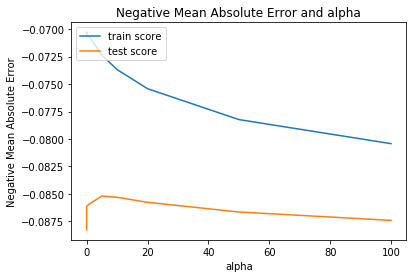

In [104]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [105]:
lm = Ridge(alpha=5)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9197867099002597
0.9005010549814116


In [106]:

# predict

model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.354),
 ('MSSubClass', -0.0),
 ('LotFrontage', -0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.059),
 ('OverallCond', 0.046),
 ('YearBuilt', -0.002),
 ('YearRemodAdd', -0.0),
 ('MasVnrArea', 0.0),
 ('ExterQual', -0.002),
 ('BsmtExposure', 0.014),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', -0.0),
 ('HeatingQC', 0.02),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.041),
 ('FullBath', 0.041),
 ('HalfBath', 0.042),
 ('BedroomAbvGr', -0.001),
 ('KitchenQual', 0.024),
 ('TotRmsAbvGrd', 0.01),
 ('Fireplaces', -0.016),
 ('FireplaceQu', 0.017),
 ('GarageYrBlt', -0.0),
 ('GarageCars', 0.08),
 ('GarageArea', -0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('MoSold', 0.0),
 ('YrSold', 0.005),
 ('Abnorml', -0.055),
 ('AdjLand', 0.055),
 ('Alloca', -0.028),
 ('Family', -0.002),
 ('Normal', 0.007),
 ('Partial', 0.023),
 ('RFn', 0.01),
 (

## Lasso

In [107]:

params = {'alpha': [0.00001,0.00002,0.00003,0.0001,0.00015,0.0002,0.0003,0.0004,0.0005]}
lasso = Lasso()

#cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 2e-05, 3e-05, 0.0001, 0.00015, 0.0002,
                                   0.0003, 0.0004, 0.0005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [108]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004986,0.000630,0.000798,3.990889e-04,1e-05,{'alpha': 1e-05},0.756769,0.756084,0.793130,0.779016,...,0.777250,0.018432,6,0.803839,0.801743,0.794237,0.794147,0.791262,0.797046,0.004857
1,0.005984,0.000632,0.000997,8.844012e-07,2e-05,{'alpha': 2e-05},0.756621,0.756622,0.793726,0.778900,...,0.777384,0.018393,5,0.803813,0.801722,0.794208,0.794130,0.791236,0.797022,0.004858
2,0.005384,0.000487,0.000998,2.780415e-07,3e-05,{'alpha': 3e-05},0.756458,0.757148,0.794291,0.778776,...,0.777501,0.018358,4,0.803769,0.801688,0.794159,0.794102,0.791191,0.796982,0.004858
3,0.004189,0.001163,0.001197,3.988029e-04,0.0001,{'alpha': 0.0001},0.754855,0.760470,0.797432,0.777830,...,0.777895,0.018204,2,0.802977,0.801070,0.793272,0.793613,0.790382,0.796263,0.004873
4,0.004189,0.000399,0.001397,4.890060e-04,0.00015,{'alpha': 0.00015},0.753223,0.762456,0.798794,0.778092,...,0.777922,0.018169,1,0.801890,0.800224,0.792059,0.793095,0.789271,0.795308,0.004887


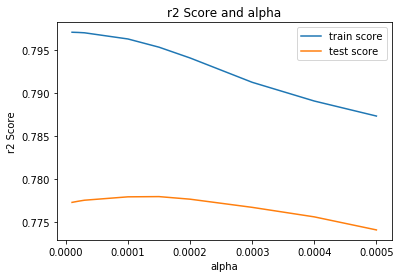

In [109]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 Score')

plt.title("r2 Score and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [110]:
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.354),
 ('MSSubClass', -0.0),
 ('LotFrontage', -0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.059),
 ('OverallCond', 0.046),
 ('YearBuilt', -0.002),
 ('YearRemodAdd', -0.0),
 ('MasVnrArea', 0.0),
 ('ExterQual', -0.002),
 ('BsmtExposure', 0.014),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', -0.0),
 ('HeatingQC', 0.02),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.041),
 ('FullBath', 0.041),
 ('HalfBath', 0.042),
 ('BedroomAbvGr', -0.001),
 ('KitchenQual', 0.024),
 ('TotRmsAbvGrd', 0.01),
 ('Fireplaces', -0.016),
 ('FireplaceQu', 0.017),
 ('GarageYrBlt', -0.0),
 ('GarageCars', 0.08),
 ('GarageArea', -0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('MoSold', 0.0),
 ('YrSold', 0.005),
 ('Abnorml', -0.055),
 ('AdjLand', 0.055),
 ('Alloca', -0.028),
 ('Family', -0.002),
 ('Normal', 0.007),
 ('Partial', 0.023),
 ('RFn', 0.01),
 (

In [111]:
lm = Lasso(alpha=0.0015)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8986990577067557
0.898279655219205


In [112]:
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.602),
 ('MSSubClass', -0.001),
 ('LotFrontage', -0.001),
 ('LotArea', 0.0),
 ('OverallQual', 0.065),
 ('OverallCond', 0.052),
 ('YearBuilt', -0.002),
 ('YearRemodAdd', -0.0),
 ('MasVnrArea', 0.0),
 ('ExterQual', 0.0),
 ('BsmtExposure', 0.013),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('HeatingQC', 0.019),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.035),
 ('FullBath', 0.016),
 ('HalfBath', 0.019),
 ('BedroomAbvGr', 0.0),
 ('KitchenQual', 0.024),
 ('TotRmsAbvGrd', 0.01),
 ('Fireplaces', -0.0),
 ('FireplaceQu', 0.014),
 ('GarageYrBlt', -0.0),
 ('GarageCars', 0.062),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('MoSold', 0.0),
 ('YrSold', 0.004),
 ('Abnorml', -0.043),
 ('AdjLand', 0.0),
 ('Alloca', -0.0),
 ('Family', -0.0),
 ('Normal', 0.0),
 ('Partial', 0.0),
 ('RFn', 0.004),
 ('Unf', -0.013),

### Summary:

##### The details for Ridge Regression are as follows: 
                                     
                                     Training - 91.9
                                     Test - 90.0
                                     Alpha - 5
                                     
##### The details for Lasso Regression are as follows: 

                                     Training - 89.8
                                     Test - 89.8
                                     Alpha - 0.0015
                                     
###### The best features for the model are as follows:

                                OverallQual- Overall Quality
                                OverallCond- Overall Condition
                                BsmtFullBath- Basement Full bathrooms
                                KitchenQual- Kitchen Quality
                                BrkFace- Brick Face
                                Crawfor- Crawford 
                                NridgHt- Northridge Heights
                                RL- Residential Low Density
                                Somerst- Somerset